In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,title,text,latitude,longitude,city_text,date_posted,date_updated,price,deleted,...,bedrooms,bathrooms,pets,laundry,parking,craigslist,place,city,state,county
0,1,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.860788,-118.170104,W. ROSAMOND BLVD. / B ST.,2018-10-08 22:29:36,2018-10-15 13:07:37,895.0,False,...,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern
1,2,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.861017,-118.169932,W. ROSAMOND BLVD. / B ST.,2018-10-15 11:44:23,NaN,895.0,False,...,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern
2,3,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.861017,-118.169932,W. ROSAMOND BLVD. / B ST.,2018-10-15 11:53:06,NaN,895.0,False,...,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern
3,4,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.861017,-118.169932,W. ROSAMOND BLVD. / B ST.,2018-10-15 13:30:43,NaN,895.0,False,...,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern
4,5,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.860683,-118.169997,W. ROSAMOND BLVD. / B ST.,2018-10-15 13:36:07,NaN,895.0,False,...,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern


In [3]:
sf = df[df['city']=='San Francisco']

# Clustering to create neighborhoods

In [4]:
cluster_data = sf[['latitude','longitude']].fillna(0)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12,random_state=0).fit(cluster_data)
hood = kmeans.predict(cluster_data)

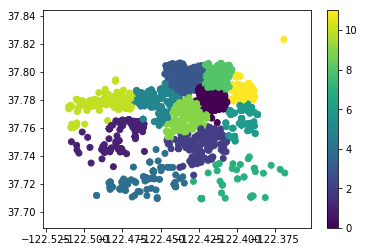

In [5]:
plt.scatter(sf['longitude'],sf['latitude'], c=hood)
plt.colorbar()

In [6]:
kmeans.cluster_centers_

array([[  37.78125249, -122.41650564],
       [  37.75477836, -122.47632143],
       [  37.74873429, -122.42389867],
       [  37.79633169, -122.43302691],
       [  37.72261291, -122.45915587],
       [  37.77946607, -122.45069722],
       [  37.76827134, -122.39486965],
       [  37.72030206, -122.40311165],
       [  37.7929209 , -122.41351546],
       [  37.76855112, -122.43178153],
       [  37.77800098, -122.48543895],
       [  37.78675304, -122.39442813]])

In [7]:
#These neighborhoods were hand-generated 
#by looking up the above centers in google maps
hood_mapping = {0:"Tenderloin",
                1:"Inner Sunset",
                2:"Mission",
                3:"Marina",
                4:"Excelsior",
                5:"Inner Richmond",
                6:"Mission Bay",
                7:"Bernal Heights",
                8:"Nob Hill",
                9:"Lower Haight",
                10:"Outer Richmond",
                11:"SoMa"}

In [8]:
sf['hood'] = hood
sf['hood'] = sf['hood'].map(hood_mapping)

/Users/bpc_msds2019/miniconda3/envs/data_viz/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/bpc_msds2019/miniconda3/envs/data_viz/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
graph_data = sf[['hood','bedrooms','bathrooms','price']].groupby('hood').agg({'bedrooms':np.mean,'bathrooms':np.mean,'price':np.mean})

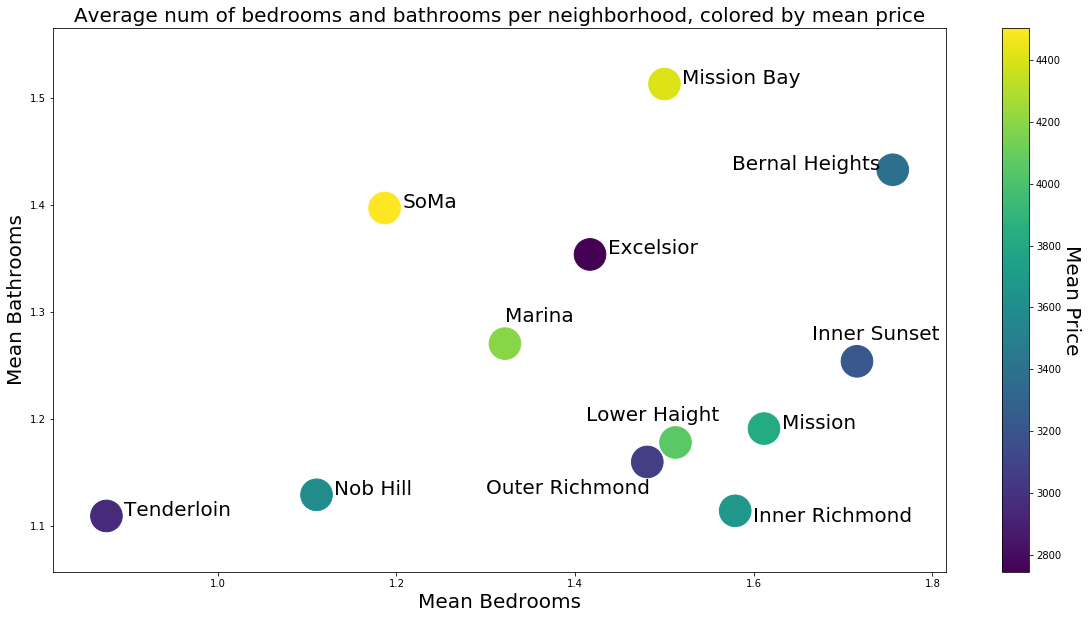

In [10]:
plt.figure(figsize=(20,10))
plt.title("Average num of bedrooms and bathrooms per neighborhood, colored by mean price", size=20)
plt.scatter(graph_data['bedrooms'],graph_data['bathrooms'],c=graph_data['price'],s=1000)
plt.xlabel("Mean Bedrooms",size=20)
plt.ylabel("Mean Bathrooms",size=20)
plt.colorbar().set_label('Mean Price', rotation=270,labelpad=20,size=20)

hoods = graph_data.index.values
plt.annotate(hoods[0], (graph_data['bedrooms'][0]-0.18, graph_data['bathrooms'][0]+0.0),size=20)
plt.annotate(hoods[1], (graph_data['bedrooms'][1]+0.02, graph_data['bathrooms'][1]),size=20)
plt.annotate(hoods[2], (graph_data['bedrooms'][2]+0.02, graph_data['bathrooms'][2]-0.01),size=20)
plt.annotate(hoods[3], (graph_data['bedrooms'][3]-0.05, graph_data['bathrooms'][3]+0.02),size=20)
plt.annotate(hoods[4], (graph_data['bedrooms'][4]-0.1, graph_data['bathrooms'][4]+0.02),size=20)
plt.annotate(hoods[5], (graph_data['bedrooms'][5]+0, graph_data['bathrooms'][5]+0.02),size=20)
plt.annotate(hoods[6], (graph_data['bedrooms'][6]+0.02, graph_data['bathrooms'][6]+0.0),size=20)
plt.annotate(hoods[7], (graph_data['bedrooms'][7]+0.02, graph_data['bathrooms'][7]+0.0),size=20)
plt.annotate(hoods[8], (graph_data['bedrooms'][8]+0.02, graph_data['bathrooms'][8]+0.0),size=20)
plt.annotate(hoods[9], (graph_data['bedrooms'][9]-0.18, graph_data['bathrooms'][9]-0.03),size=20)
plt.annotate(hoods[10], (graph_data['bedrooms'][10]+0.02, graph_data['bathrooms'][10]-0.0),size=20)
plt.annotate(hoods[11], (graph_data['bedrooms'][11]+0.02, graph_data['bathrooms'][11]+0.0),size=20)



plt.savefig("week2.png")
